# The Epitome of Salt's Sunrise Show: Murder at Karlov Manor (MKM)
## Author: Kevin Stull
## Guests: Jon, Josh, Nate 
## Card Names
https://sealeddeck.tech/sets/mkm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

c = pd.read_csv('data/MKM_Kevin_commons.csv')
u = pd.read_csv('data/MKM_Kevin_uncommons.csv')
eos = pd.concat([c, u], ignore_index=True)
eos = eos[['Name', 'Color', 'Rarity']]

# raters
raters = ['Jon', 'Josh', 'Kevin', 'Nate']

for rater in raters:
    c = pd.read_csv('data/MKM_' + rater + '_commons.csv')
    u = pd.read_csv('data/MKM_' + rater + '_uncommons.csv')
    temp = pd.concat([c, u], ignore_index=True)
    eos[rater] = temp[rater]
tier_num = {'F': 0., 'G':0., 'G+':0., 'D-': 1., 'D': 2., 'D+': 3., 
            'C-': 4., 'C': 5., 'C+': 6., 'B-': 7., 'B': 8., 'B+': 9., 
            'A-': 10., 'A': 11., 'A+': 12.}
for rater in raters:
    eos[str(rater) + '_num'] = eos[rater].map(tier_num)
eos = eos.dropna().copy()

# use to check for n/a rows 
#rows_with_na = eos[eos.isna().any(axis=1)]
#print(rows_with_na)

# General Analysis

### Favorite Color
- Jon: Red
- Josh: Black
- Kevin: Black
- Nate: White


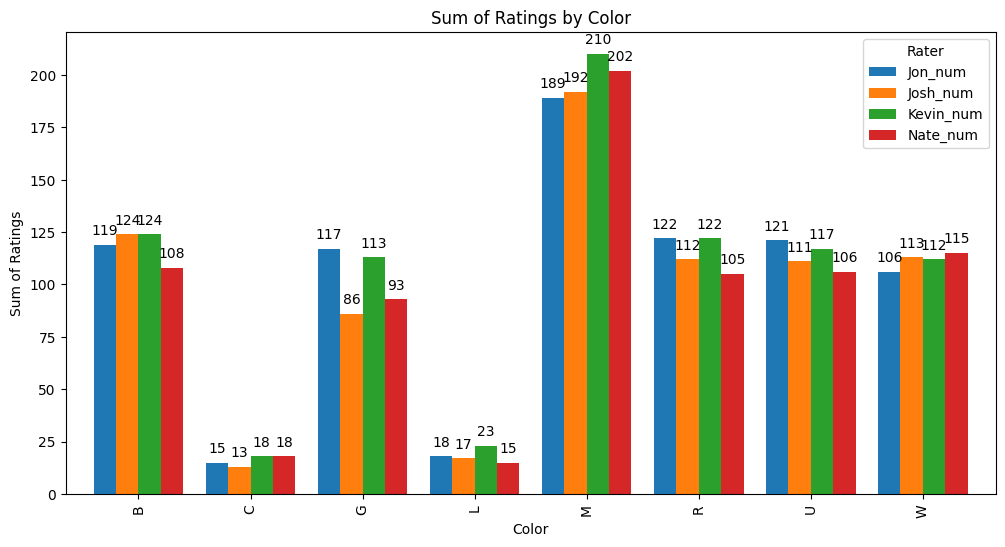

In [2]:
clean = eos.copy()
pivot_df = clean.pivot_table(index='Color', values=[rater + '_num' for rater in raters], aggfunc='sum')
ax = pivot_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Sum of Ratings by Color')
plt.xlabel('Color')
plt.ylabel('Sum of Ratings')
plt.legend(title='Rater')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Strongest Color Pairs 

In [3]:
from itertools import combinations
colors = ['W', 'R', 'B', 'U', 'G']
eos['Group'] = eos[[rater + '_num' for rater in raters]].sum(axis=1) / len(raters)
color_pairs = list(combinations(colors, 2))
color_pair_scores = {}
for pair in color_pairs:
    color1, color2 = pair
    pair_column_name = f'{color1}_{color2}_total_score'
    pair_rows = eos[(eos['Color'] == color1) | (eos['Color'] == color2)]
    total_score = pair_rows['Group'].sum()
    color_pair_scores[pair] = total_score

sorted_color_pair_scores = dict(sorted(color_pair_scores.items(), key=lambda item: item[1], reverse=True))
sorted_color_pair_scores

{('R', 'B'): 234.0,
 ('B', 'U'): 232.5,
 ('W', 'B'): 230.25,
 ('R', 'U'): 229.0,
 ('W', 'R'): 226.75,
 ('W', 'U'): 225.25,
 ('B', 'G'): 221.0,
 ('R', 'G'): 217.5,
 ('U', 'G'): 216.0,
 ('W', 'G'): 213.75}

## Nicest/ Meanest Grader
- Nicest: Kevin
- Meanest: Nate

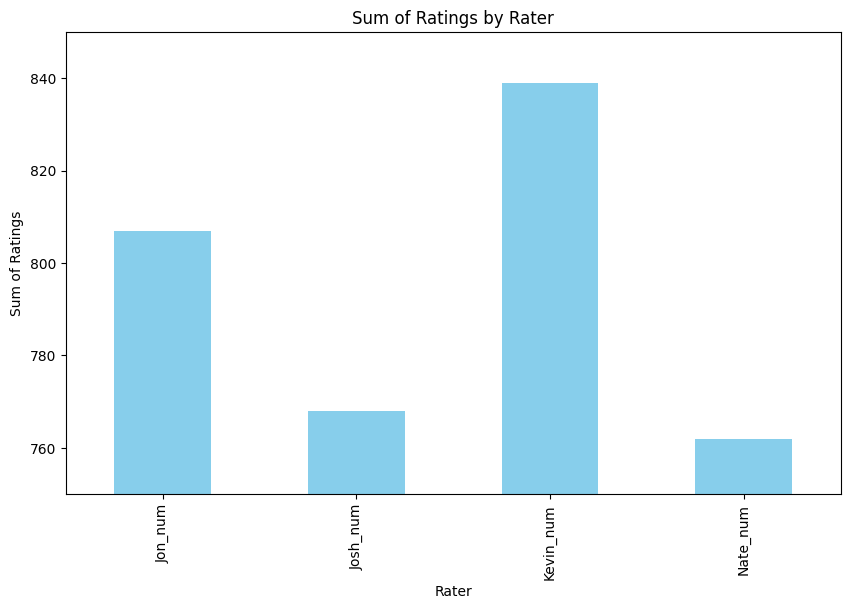

In [4]:
sum_by_rater = clean[[rater + '_num' for rater in raters]].sum()
sum_by_rater.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Sum of Ratings by Rater')
plt.xlabel('Rater')
plt.ylabel('Sum of Ratings')
plt.ylim(bottom=750, top=850)
plt.show()

## Best Commons by Color

In [5]:
eos_commons = eos[eos['Rarity'] == 'C']
top_cards_by_color = eos_commons.groupby('Color').apply(lambda x: x.nlargest(3, 'Group')).reset_index(drop=True)
print(top_cards_by_color[['Name', 'Color', 'Group']].to_string(index=False))

                  Name Color  Group
                Murder     B   7.50
Slice from the Shadows     B   5.50
  Extract a Confession     B   5.00
    Gravestone Strider     C   2.50
          Thinking Cap     C   2.00
  Sanitation Automaton     C   2.00
    Fanatical Strength     G   5.00
        Tunnel Tipster     G   4.75
       Topiary Panther     G   4.75
         Escape Tunnel     L   5.75
   Public Thoroughfare     L   4.25
     Gadget Technician     M   7.50
       Sanguine Savior     M   6.75
            Dog Walker     M   6.25
             Galvanize     R   8.25
                 Shock     R   7.25
    Person of Interest     R   5.00
     Cold Case Cracker     U   6.25
   Crimestopper Sprite     U   5.75
   Dramatic Accusation     U   5.00
      Novice Inspector     W   6.75
     Makeshift Binding     W   6.25
         Inside Source     W   5.50


## Best Uncommons by Color


In [6]:
eos_uncommons = eos[eos['Rarity'] == 'U']
top_cards_by_color = eos_uncommons.groupby('Color').apply(lambda x: x.nlargest(3, 'Group')).reset_index(drop=True)
print(top_cards_by_color[['Name', 'Color', 'Group']].to_string(index=False))

                       Name Color  Group
               Long Goodbye     B   6.75
           Leering Onlooker     B   6.50
        Clandestine Meddler     B   6.25
 Case of the Shattered Pact     C   3.50
          Magnetic Snuffler     C   2.75
          Lumbering Laundry     C   2.25
      Hard-Hitting Question     G   7.00
          Greenbelt Radical     G   6.75
Case of the Trampled Garden     G   6.50
       Branch of Vitu-Ghazi     L   4.75
         Scene of the Crime     L   3.50
        Deadly Complication     M   8.25
            Lightning Helix     M   8.00
         Gleaming Geardrake     M   7.75
          Torch the Witness     R   6.75
         Harried Dronesmith     R   6.25
  Case of the Burning Masks     R   6.00
            Exit Specialist     U   7.00
       Surveillance Monitor     U   6.50
 Case of the Filched Falcon     U   6.25
            Not on My Watch     W   5.75
Case of the Gateway Express     W   5.50
            Karlov Watchdog     W   5.25


## Goodest Art 

In [7]:
sorted_eos = eos.sort_values(by='Group', ascending=True).copy()
print(sorted_eos[['Name', 'Group']][:3].to_string(index=False))

            Name  Group
Magnifying Glass    1.0
 Behind the Mask    1.5
 The Chase Is On    1.5


## Highest Variance

In [8]:
eos['Variance'] = eos[[rater + '_num' for rater in raters]].var(axis=1)
sorted_eos = eos.sort_values(by='Variance', ascending=False).copy()
print(sorted_eos[['Name', 'Variance']][:15].to_string(index=False))

                       Name  Variance
       Undercover Crocodelf  8.666667
       Undercity Eliminator  8.000000
              Polygraph Orb  7.583333
       Essence of Antiquity  7.333333
   Eliminate the Impossible  6.916667
             Cornered Crook  6.250000
      Suspicious Detonation  6.250000
            Coerced to Kill  5.666667
          Flotsam // Jetsam  5.666667
Case of the Trampled Garden  5.666667
          Case File Auditor  5.666667
         Harried Dronesmith  4.916667
        Marketwatch Phantom  4.666667
           Agency Outfitter  4.666667
      Neighborhood Guardian  4.666667


## Hottest Takes 


In [9]:
for rater in raters:
    other_raters = [col for col in eos.columns if col.endswith('_num') and col != f'{rater}_num']
    eos[f'{rater}_mean'] = eos[other_raters].mean(axis=1)

for rater in raters:
    eos[f'{rater}_Hot_Take'] = abs(eos[f'{rater}_num'] - eos[f'{rater}_mean'])

for rater in raters:
    sorted_eos = eos.sort_values(by= rater + '_Hot_Take', ascending=False).copy()
    print(sorted_eos[['Name', rater + '_Hot_Take']][:3].to_string(index=False))
    print()

                 Name  Jon_Hot_Take
 Essence of Antiquity      5.333333
Suspicious Detonation      4.333333
  Nightdrinker Moroii      3.666667

                Name  Josh_Hot_Take
   Case File Auditor       4.666667
 Marketwatch Phantom       4.000000
Undercover Crocodelf       4.000000

                Name  Kevin_Hot_Take
Undercover Crocodelf        5.333333
    Agency Outfitter        4.000000
      Cornered Crook        3.666667

                       Name  Nate_Hot_Take
       Undercity Eliminator       5.333333
Case of the Trampled Garden       4.666667
             Cornered Crook       4.333333

